## Obserwator (ang. Observer)

**Typ**: behawioralny  
**Zakres**: obiektowy  
**Inne nazwy**: Obiekty zależne (*ang. dependents*), publikuj-subskrybuj (*ang. publish-subscribe*)

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>obserwator</b> definiuje zależność jeden-do-wielu między obiektami tak, że zmiana stanu jednego obiektu powoduje automatyczne powiadomienie i aktualizację wszystkich obiektów zależnych.
</div>

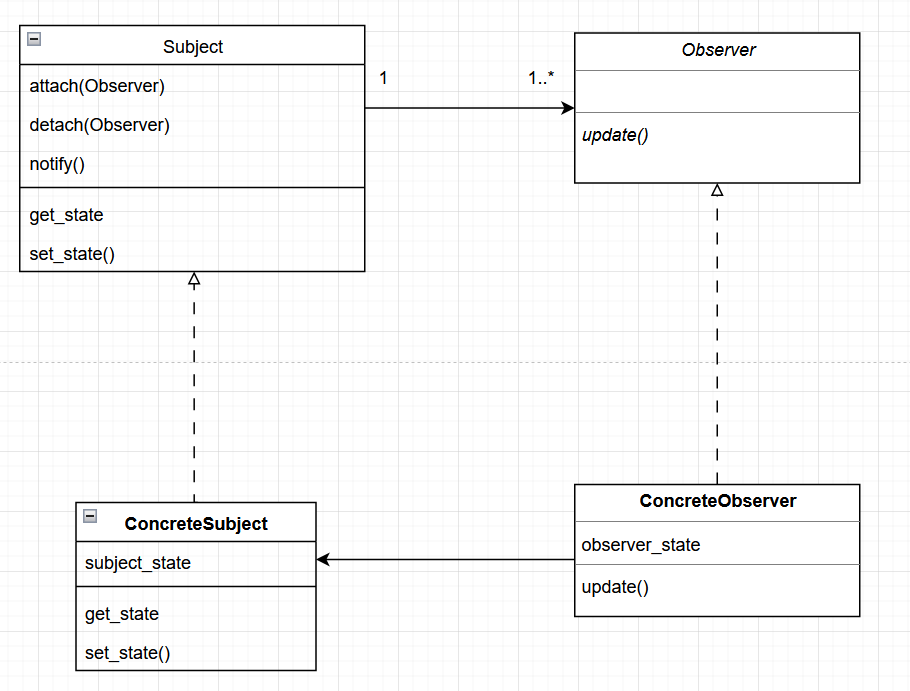

### Problem - powiadamianie wielu obiektów o zmianie

Kanał YouTube publikuje nowy film. Wszyscy subskrybenci powinni dostać **powiadomienie**.

**Problem:**
- Jak powiadomić wszystkich subskrybentów?
- Jak uniknąć sztywnego powiązania kanału z subskrybentami?
- Jak umożliwić subskrybowanie/odsubskrybowanie?

### Naiwne podejście - sztywne powiązanie

In [ ]:
class User:
    def __init__(self, name):
        self.name = name
    
    def notify(self, video):
        print(f"👤 {self.name}: Nowy film - {video}")


class YouTubeChannel:
    def __init__(self, name):
        self.name = name
        # ❌ Sztywne powiązanie - kanał zna konkretnych użytkowników
        self.user1 = None
        self.user2 = None
        self.user3 = None
    
    def upload_video(self, video):
        print(f"📺 {self.name}: Publikuję '{video}'\n")
        # ❌ Ręczne powiadamianie każdego
        if self.user1:
            self.user1.notify(video)
        if self.user2:
            self.user2.notify(video)
        if self.user3:
            self.user3.notify(video)

In [ ]:
channel = YouTubeChannel("Python Tutorials")

alice = User("Alice")
bob = User("Bob")

# "Subskrypcja" - ręczne przypisanie
channel.user1 = alice
channel.user2 = bob

channel.upload_video("Design Patterns")

**Problemy:**
- ❌ **Sztywne powiązanie** - kanał zna konkretnych użytkowników (`user1`, `user2`)
- ❌ **Ograniczona liczba** - co jeśli 100 subskrybentów? `user1...user100`?
- ❌ **Brak dynamiczności** - jak odsubskrybować?
- ❌ Kanał musi **znać** wszystkich subskrybentów

### Rozwiązanie - wzorzec Obserwator

**Idea:** Kanał (Subject) przechowuje **listę obserwatorów**. Powiadamia wszystkich na liście.

### Krok 1: Interfejs Observer

W naszym przykładzie kontrakt na usera

In [ ]:
from abc import ABC, abstractmethod

class Observer(ABC):
    """Interfejs dla obserwatorów"""
    
    @abstractmethod
    def update(self, message):
        """Otrzymuje powiadomienie"""
        pass

### Krok 2: Subject (Observable) - zarządza obserwatorami

W naszym przykładzie kontrakt na kanał

In [ ]:
class Subject:
    """Subject - zarządza obserwatorami i powiadamia ich"""
    
    def __init__(self):
        self._observers = []  # Lista obserwatorów
    
    def attach(self, observer: Observer):
        """Dodaj obserwatora (subskrybuj)"""
        if observer not in self._observers:
            self._observers.append(observer)
            print(f"➕ Subskrybent dołączył")
    
    def detach(self, observer: Observer):
        """Usuń obserwatora (odsubskrybuj)"""
        if observer in self._observers:
            self._observers.remove(observer)
            print(f"➖ Subskrybent odszedł")
    
    def notify(self, message):
        """Powiadom wszystkich obserwatorów"""
        for observer in self._observers:
            observer.update(message)

**Kluczowy mechanizm:**
- `attach()` - dodaj obserwatora do listy
- `detach()` - usuń obserwatora z listy
- `notify()` - powiadom wszystkich na liście (pętla `for`)

### Krok 3: ConcreteSubject - kanał YouTube

In [ ]:
class YouTubeChannel(Subject):
    """Konkretny Subject - kanał YouTube"""
    
    def __init__(self, name):
        super().__init__()
        self.name = name
    
    def upload_video(self, video):
        print(f"\n📺 {self.name}: Publikuję '{video}'")
        # Powiadom wszystkich subskrybentów
        self.notify(f"Nowy film: {video}")

### Krok 4: ConcreteObserver - użytkownik

In [ ]:
class User(Observer):
    """Konkretny Observer - użytkownik"""
    
    def __init__(self, name):
        self.name = name
    
    def update(self, message):
        """Otrzymuje powiadomienie"""
        print(f"👤 {self.name}: {message}")

### Krok 5: Użycie - dynamiczne subskrybowanie

In [ ]:
# Tworzenie
channel = YouTubeChannel("Python Tutorials")
alice = User("Alice")
bob = User("Bob")
charlie = User("Charlie")

# Subskrybowanie
channel.attach(alice)
channel.attach(bob)

# Publikacja - powiadamia Alice i Bob
channel.upload_video("Design Patterns")

# Charlie dołącza
print()
channel.attach(charlie)

# Publikacja - powiadamia Alice, Bob i Charlie
channel.upload_video("SOLID Principles")

# Bob odsubskrybuje
print()
channel.detach(bob)

# Publikacja - powiadamia tylko Alice i Charlie
channel.upload_video("Clean Code")

**Zalety:**
- ✅ **Luźne powiązanie** - kanał nie zna konkretnych użytkowników
- ✅ **Dynamiczność** - attach/detach w dowolnym momencie
- ✅ **Skalowalność** - nieograniczona liczba obserwatorów
- ✅ **Open/Closed** - nowi obserwatorzy bez zmiany Subject

## Jak to działa? - wizualizacja

**Elementy wzorca Obserwator:**

1. **Subject (Observable)** - `Subject`
   - Przechowuje listę obserwatorów (`_observers`)
   - Zarządza subskrypcją (`attach()`, `detach()`)
   - Powiadamia obserwatorów (`notify()`)

2. **ConcreteSubject** - `YouTubeChannel`
   - Konkretny subject
   - Przechowuje stan (np. nowy film)
   - Wywołuje `notify()` gdy stan się zmienia

3. **Observer** - `Observer`
   - Interfejs dla obserwatorów
   - Metoda `update()` - otrzymuje powiadomienie

4. **ConcreteObserver** - `User`
   - Konkretny obserwator
   - Implementuje `update()` - reaguje na powiadomienie

**Kluczowa właściwość:**
> Subject nie zna konkretnych obserwatorów - zna tylko interfejs `Observer`

## Przykład 2 - Stacja pogodowa

In [ ]:
from abc import ABC, abstractmethod

# ════════════════════════════════════════════════════════════
# Observer
# ════════════════════════════════════════════════════════════
class WeatherObserver(ABC):
    @abstractmethod
    def update(self, temperature: float, humidity: float):
        pass


# ════════════════════════════════════════════════════════════
# Subject - Stacja pogodowa
# ════════════════════════════════════════════════════════════
class WeatherStation:
    def __init__(self):
        self._observers = []
        self._temperature = 0
        self._humidity = 0
    
    def attach(self, observer: WeatherObserver):
        self._observers.append(observer)
    
    def detach(self, observer: WeatherObserver):
        self._observers.remove(observer)
    
    def notify(self):
        for observer in self._observers:
            observer.update(self._temperature, self._humidity)
    
    def set_measurements(self, temperature: float, humidity: float):
        """Nowe pomiary - powiadom obserwatorów"""
        print(f"\n🌡️  Nowe pomiary: {temperature}°C, wilgotność {humidity}%")
        self._temperature = temperature
        self._humidity = humidity
        self.notify()  # Automatyczne powiadomienie


# ════════════════════════════════════════════════════════════
# ConcreteObservers - Wyświetlacze
# ════════════════════════════════════════════════════════════
class CurrentConditionsDisplay(WeatherObserver):
    """Wyświetla aktualne warunki"""
    
    def update(self, temperature: float, humidity: float):
        print(f"📊 Aktualne warunki: {temperature}°C, wilgotność {humidity}%")


class StatisticsDisplay(WeatherObserver):
    """Wyświetla statystyki"""
    
    def __init__(self):
        self.temperatures = []
    
    def update(self, temperature: float, humidity: float):
        self.temperatures.append(temperature)
        avg = sum(self.temperatures) / len(self.temperatures)
        print(f"📈 Średnia temperatura: {avg:.1f}°C")


class ForecastDisplay(WeatherObserver):
    """Wyświetla prognozę"""
    
    def update(self, temperature: float, humidity: float):
        if temperature > 25:
            print(f"☀️  Prognoza: Słonecznie!")
        elif temperature > 15:
            print(f"⛅ Prognoza: Umiarkowanie")
        else:
            print(f"🌧️  Prognoza: Deszczowo")

In [ ]:
# Tworzenie
station = WeatherStation()

current = CurrentConditionsDisplay()
stats = StatisticsDisplay()
forecast = ForecastDisplay()

# Subskrybowanie
station.attach(current)
station.attach(stats)
station.attach(forecast)

# Pomiary - powiadamia wszystkie wyświetlacze
station.set_measurements(28, 65)
station.set_measurements(22, 70)
station.set_measurements(12, 80)

**Każdy wyświetlacz reaguje inaczej:**
- `CurrentConditionsDisplay` - pokazuje aktualne
- `StatisticsDisplay` - liczy średnią
- `ForecastDisplay` - przewiduje pogodę

## Warianty wzorca

**Wariant 1: Push model (domyślny)**

Subject **wysyła** dane do obserwatorów:
```python
def notify(self):
    for observer in self._observers:
        observer.update(self._temperature, self._humidity)  # Wysyła dane
```

**Wariant 2: Pull model**

Subject powiadamia, obserwator **pobiera** dane:
```python
def notify(self):
    for observer in self._observers:
        observer.update(self)  # Wysyła siebie (referencję)

# Observer
def update(self, subject):
    temp = subject.get_temperature()  # Pobiera dane sam
```

**Wariant 3: Event-based (z typem zdarzenia)**

```python
def notify(self, event_type, data):
    for observer in self._observers:
        observer.update(event_type, data)  # "video_uploaded", "comment_added"
```

## Kiedy używać wzorca Obserwator?

Wzorzec Obserwator stosuj gdy:

1. **Zmiana w jednym obiekcie wymaga zmiany w innych**
   - Liczba obiektów do powiadomienia nieznana z góry

2. **Chcesz uniknąć sztywnego powiązania**
   - Subject nie powinien znać konkretnych obserwatorów

3. **Dynamiczne subskrybowanie/odsubskrybowanie**
   - W runtime dodawanie/usuwanie obserwatorów

4. **Zdarzenie może mieć wielu odbiorców**
   - Event system

**Przykłady praktyczne:**
- GUI event handling (button click → handlers)
- Model-View-Controller (model → views)
- Publish-Subscribe systems (pub/sub)
- Event-driven architecture
- Notyfikacje (push notifications)
- Data binding (Angular, React)
- Reactive programming (RxJS, RxPy)